In [1]:
from matplotlib import colors
from matplotlib.lines import Line2D
from matplotlib.ticker import PercentFormatter
from sklearn.cluster import KMeans
from sklearn.datasets import make_classification
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.manifold import TSNE
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
import matplotlib as matplotlib
import matplotlib.pyplot as plt
from matplotlib import colors
from matplotlib import lines as mpl
from matplotlib.ticker import PercentFormatter
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
%matplotlib inline

In [2]:
#load the data after updating them using Generator.ipynb (Instructions, Resources)
crypto_orig = pd.read_csv(('Resources//crypto_data.csv'), index_col = 0)

In [3]:
crypto_name = pd.read_csv(('Resources//crypto_data.csv'))
crypto_name = pd.DataFrame(crypto_name)
# Create a new DataFrame that holds only the cryptocurrencies names.
coin_names = crypto_name.filter(['CoinName', 'IsTrading'], axis=1)
coin_names

,CoinName,IsTrading
0,42 Coin,True
1,365Coin,True
2,404Coin,True
3,SixEleven,True
4,808,True
...,...,...
1247,BitcoinPlus,True
1248,DivotyCoin,False
1249,Giotto Coin,False
1250,OpenSourceCoin,False


In [4]:
coin_names = pd.DataFrame(coin_names)
crypto_orig = pd.DataFrame(crypto_orig)
crypto_orig.head()

,CoinName,Algorithm,IsTrading,ProofType,TotalCoinsMined,TotalCoinSupply
42,42 Coin,Scrypt,True,PoW/PoS,4.199995e+01,42
365,365Coin,X11,True,PoW/PoS,NaN,2300000000
404,404Coin,Scrypt,True,PoW/PoS,1.055185e+09,532000000
611,SixEleven,SHA-256,True,PoW,NaN,611000
808,808,SHA-256,True,PoW/PoS,0.000000e+00,0


In [5]:
# Method 1 - Filter dataframe
crypto_trading = crypto_orig[crypto_orig['IsTrading'] == True]
crypto_trading.head()

,CoinName,Algorithm,IsTrading,ProofType,TotalCoinsMined,TotalCoinSupply
42,42 Coin,Scrypt,True,PoW/PoS,4.199995e+01,42
365,365Coin,X11,True,PoW/PoS,NaN,2300000000
404,404Coin,Scrypt,True,PoW/PoS,1.055185e+09,532000000
611,SixEleven,SHA-256,True,PoW,NaN,611000
808,808,SHA-256,True,PoW/PoS,0.000000e+00,0


In [6]:
crypto_current = crypto_trading.drop(['IsTrading'], axis=1)
crypto_current

,CoinName,Algorithm,ProofType,TotalCoinsMined,TotalCoinSupply
42,42 Coin,Scrypt,PoW/PoS,4.199995e+01,42
365,365Coin,X11,PoW/PoS,NaN,2300000000
404,404Coin,Scrypt,PoW/PoS,1.055185e+09,532000000
611,SixEleven,SHA-256,PoW,NaN,611000
808,808,SHA-256,PoW/PoS,0.000000e+00,0
...,...,...,...,...,...
SERO,Super Zero,Ethash,PoW,NaN,1000000000
UOS,UOS,SHA-256,DPoI,NaN,1000000000
BDX,Beldex,CryptoNight,PoW,9.802226e+08,1400222610
ZEN,Horizen,Equihash,PoW,7.296538e+06,21000000


In [7]:
#crypto_curr = crypto_current.drop(['CoinName'], axis=1)
#crypto_curr.head() 

In [8]:
crypto_nan = crypto_current.dropna()
crypto_drop = pd.DataFrame(crypto_nan)
crypto_drop.head()

,CoinName,Algorithm,ProofType,TotalCoinsMined,TotalCoinSupply
42,42 Coin,Scrypt,PoW/PoS,4.199995e+01,42
404,404Coin,Scrypt,PoW/PoS,1.055185e+09,532000000
808,808,SHA-256,PoW/PoS,0.000000e+00,0
1337,EliteCoin,X13,PoW/PoS,2.927942e+10,314159265359
BTC,Bitcoin,SHA-256,PoW,1.792718e+07,21000000


In [9]:
#crypto_curr = crypto_drop.drop(['CoinName'], axis=1)
#crypto_curr.head() 

In [10]:
crypto_nan = crypto_current.dropna()
crypto_drop = pd.DataFrame(crypto_nan)
crypto_drop.head()

,CoinName,Algorithm,ProofType,TotalCoinsMined,TotalCoinSupply
42,42 Coin,Scrypt,PoW/PoS,4.199995e+01,42
404,404Coin,Scrypt,PoW/PoS,1.055185e+09,532000000
808,808,SHA-256,PoW/PoS,0.000000e+00,0
1337,EliteCoin,X13,PoW/PoS,2.927942e+10,314159265359
BTC,Bitcoin,SHA-256,PoW,1.792718e+07,21000000


In [11]:
dummy_columns = ['Algorithm', 'ProofType']

In [12]:
crypto_coin_df = pd.get_dummies(crypto_drop, columns=dummy_columns)
crypto_coin_df

,CoinName,TotalCoinsMined,TotalCoinSupply,Algorithm_1GB AES Pattern Search,Algorithm_536,Algorithm_Argon2,Algorithm_Argon2d,Algorithm_BLAKE256,Algorithm_Blake,Algorithm_Blake2S,...,ProofType_PoW/PoS,ProofType_PoW/PoS,ProofType_PoW/PoW,ProofType_PoW/nPoS,ProofType_Pos,ProofType_Proof of Authority,ProofType_Proof of Trust,ProofType_TPoS,ProofType_Zero-Knowledge Proof,ProofType_dPoW/PoW
42,42 Coin,4.199995e+01,42,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
404,404Coin,1.055185e+09,532000000,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
808,808,0.000000e+00,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
1337,EliteCoin,2.927942e+10,314159265359,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
BTC,Bitcoin,1.792718e+07,21000000,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ZEPH,ZEPHYR,2.000000e+09,2000000000,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
GAP,Gapcoin,1.493105e+07,250000000,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
BDX,Beldex,9.802226e+08,1400222610,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
ZEN,Horizen,7.296538e+06,21000000,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [13]:
crypto_coin_df['index'] = np.arange(len(crypto_coin_df))
crypto_coin_df

,CoinName,TotalCoinsMined,TotalCoinSupply,Algorithm_1GB AES Pattern Search,Algorithm_536,Algorithm_Argon2,Algorithm_Argon2d,Algorithm_BLAKE256,Algorithm_Blake,Algorithm_Blake2S,...,ProofType_PoW/PoS,ProofType_PoW/PoW,ProofType_PoW/nPoS,ProofType_Pos,ProofType_Proof of Authority,ProofType_Proof of Trust,ProofType_TPoS,ProofType_Zero-Knowledge Proof,ProofType_dPoW/PoW,index
42,42 Coin,4.199995e+01,42,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
404,404Coin,1.055185e+09,532000000,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
808,808,0.000000e+00,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2
1337,EliteCoin,2.927942e+10,314159265359,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,3
BTC,Bitcoin,1.792718e+07,21000000,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ZEPH,ZEPHYR,2.000000e+09,2000000000,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,680
GAP,Gapcoin,1.493105e+07,250000000,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,681
BDX,Beldex,9.802226e+08,1400222610,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,682
ZEN,Horizen,7.296538e+06,21000000,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,683


In [16]:
# Create a new DataFrame that holds only the cryptocurrencies names.
coin_names = crypto_coin_df.filter(['CoinName'], axis=1)
coin_names

,CoinName
42,42 Coin
404,404Coin
808,808
1337,EliteCoin
BTC,Bitcoin
...,...
ZEPH,ZEPHYR
GAP,Gapcoin
BDX,Beldex
ZEN,Horizen


In [18]:
# Create a new DataFrame that holds only the cryptocurrencies names.
crypto_ctt = crypto_coin_df.filter(['CoinName', 'TotalCoinsMined', 'TotalCoinSupply', 'index'], axis=1)
crypto_ctt 

,CoinName,TotalCoinsMined,TotalCoinSupply,index
42,42 Coin,4.199995e+01,42,0
404,404Coin,1.055185e+09,532000000,1
808,808,0.000000e+00,0,2
1337,EliteCoin,2.927942e+10,314159265359,3
BTC,Bitcoin,1.792718e+07,21000000,4
...,...,...,...,...
ZEPH,ZEPHYR,2.000000e+09,2000000000,680
GAP,Gapcoin,1.493105e+07,250000000,681
BDX,Beldex,9.802226e+08,1400222610,682
ZEN,Horizen,7.296538e+06,21000000,683


In [19]:
crypto_coin = crypto_ctt.drop(['CoinName'], axis=1)
crypto_coin.head() 

,TotalCoinsMined,TotalCoinSupply,index
42,4.199995e+01,42,0
404,1.055185e+09,532000000,1
808,0.000000e+00,0,2
1337,2.927942e+10,314159265359,3
BTC,1.792718e+07,21000000,4


In [20]:
# Standardize the data with StandardScaler().
crypto_scaled = StandardScaler().fit_transform(crypto_coin)
print(crypto_scaled[0:5])

[[-0.10282804 -0.03823841 -1.72952411]
 [-0.07661326 -0.03823825 -1.72446702]
 [-0.10282804 -0.03823841 -1.71940993]
 [ 0.62458365 -0.03814919 -1.71435285]
 [-0.10238266 -0.0382384  -1.70929576]]


In [21]:
# Using PCA to reduce dimension to three principal components.
#pca3D = PCA(n_components=3, random_state=1)
pca = PCA(n_components=2, random_state=1)
crypto_pca = pca.fit_transform(crypto_scaled)
crypto_pca

array([[-1.3117982 , -0.06339349],
       [-1.29107051, -0.07363135],
       [-1.30457598, -0.06298819],
       ...,
       [ 1.16688259,  0.0651143 ],
       [ 1.15471141,  0.07494332],
       [ 1.15820624,  0.07521689]])

In [24]:
# Transform PCA data to a DataFrame
crypto_pca_df = pd.DataFrame(data=crypto_pca, columns=["pc1", "pc2"], index= coin_names.index)
#crypto_pca_df[columns=["pc1", "pc2"], index= coin_names.index)]     
#data=crypto_pca, columns=["pc1", "pc2"], index= coin_names.index)
crypto_pca_df

,pc1,pc2
42,-1.311798,-0.063393
404,-1.291071,-0.073631
808,-1.304576,-0.062988
1337,-0.825990,-0.352412
BTC,-1.297063,-0.062760
...,...,...
ZEPH,1.176203,0.054619
GAP,1.147613,0.074463
BDX,1.166883,0.065114
ZEN,1.154711,0.074943


In [27]:
crypto_pca_df['index'] = np.arange(len(crypto_pca_df))
crypto_pca_df

,pc1,pc2,index
42,-1.311798,-0.063393,0
404,-1.291071,-0.073631,1
808,-1.304576,-0.062988,2
1337,-0.825990,-0.352412,3
BTC,-1.297063,-0.062760,4
...,...,...,...
ZEPH,1.176203,0.054619,680
GAP,1.147613,0.074463,681
BDX,1.166883,0.065114,682
ZEN,1.154711,0.074943,683


In [28]:
tsne = TSNE(learning_rate=100)
crypto_features = tsne.fit_transform(crypto_pca_df)

C:\Users\jksmi\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(


In [29]:
# Check that dimensions have been reduced to two
crypto_features.shape

(685, 2)

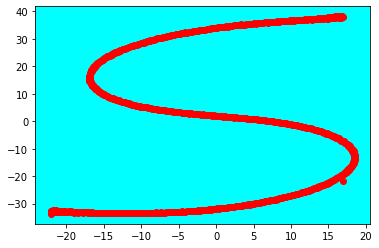

In [30]:
# Plot the results

plt.scatter(crypto_features[:,0], crypto_features[:,1], color='red')
ax = plt.gca()
ax.set_facecolor('cyan')


plt.show()

In [31]:
# Find out the best number of clusters by creating "the elbow curve" plot
inertia = [] #list
# Same as k = list(range(1, 11))
#Randomly initialize the <k> starting centroids 
k = list(range(1, 25))
#Each data point is assigned to its nearest centroid, then the centroids are recomputed
# as the mean of the data points assigned to the respective cluster

In [32]:
# Looking for the best k is done using  an elbow curve, where the x axis is the K-value
# and the y axis is some objective function (f.e. inertia)
# iterate through clusters
for i in k:
    # use KMeans.(n_clusters=i, random_state=0) fx
    KMs = KMeans(n_clusters=i, random_state=0)
    # modify your DataFrame using KMeans.fit(DataFrame)
    KMs.fit(crypto_features)
    inertia.append(KMs.inertia_)

# Define a DataFrame to plot the Elbow Curve using hvPlot
elbow_data = {"k": k, "inertia": inertia}
df_elbow = pd.DataFrame(elbow_data)
df_elbow

C:\Users\jksmi\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


,k,inertia
0,1,528882.625000
1,2,199964.500000
2,3,121768.476562
3,4,66672.812500
4,5,45793.929688
5,6,32655.394531
6,7,24000.273438
7,8,18495.894531
8,9,14677.458984
9,10,11920.478516


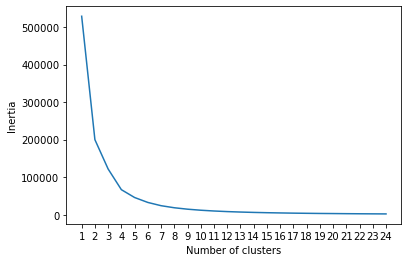

In [33]:
# Plot the elbow curve to find the best candidate(s) for k

plt.plot(df_elbow['k'], df_elbow['inertia'])
plt.xticks(range(1,25))
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

In [34]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

In [35]:
# Initialize the K-Means model to identify clusters in the dataset.
model = KMeans(n_clusters=3, random_state=0)
# Fitting model
model.fit(crypto_features)

KMeans(n_clusters=3, random_state=0)

In [36]:
# Predict clusters
predictions = model.predict(crypto_features)
predictions

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,

In [37]:
# Create a new DataFrame including predicted clusters and cryptocurrencies features.
# Concatentate the crypto_df and pcs_df DataFrames on the same columns.
crypto_clusters = pd.concat([crypto_ctt, crypto_pca_df],axis=1)

#  Add a new column, "Class" to the clustered_df DataFrame that holds the predictions.
crypto_clusters['Class'] = model.labels_

# Print the shape of the clustered_df
print(crypto_clusters.shape)
crypto_clusters.head(10)

(685, 8)


,CoinName,TotalCoinsMined,TotalCoinSupply,index,pc1,pc2,index,Class
42,42 Coin,4.199995e+01,42,0,-1.311798,-0.063393,0,1
404,404Coin,1.055185e+09,532000000,1,-1.291071,-0.073631,1,1
808,808,0.000000e+00,0,2,-1.304576,-0.062988,2,1
1337,EliteCoin,2.927942e+10,314159265359,3,-0.825990,-0.352412,3,1
BTC,Bitcoin,1.792718e+07,21000000,4,-1.297063,-0.062760,4,1
ETH,Ethereum,1.076842e+08,0,5,-1.291996,-0.063446,5,1
LTC,Litecoin,6.303924e+07,84000000,6,-1.289109,-0.062801,6,1
DASH,Dash,9.031294e+06,22000000,7,-1.286374,-0.062064,7,1
XMR,Monero,1.720114e+07,0,8,-1.282630,-0.061942,8,1
ETC,Ethereum Classic,1.133597e+08,210000000,9,-1.277459,-0.062691,9,1


In [42]:
# The function should add a new column containing the cluster value of each sample (row).
# The function should return a copy of the new dataframe with predicted clusters
crypto_feat = pd.DataFrame(crypto_clusters)
#crypto_feat["class"] = model.labels_
#crypto_feat.columns = ["col1", "col2", "class"]
crypto_feat.head()

,CoinName,TotalCoinsMined,TotalCoinSupply,index,pc1,pc2,index,Class
42,42 Coin,4.199995e+01,42,0,-1.311798,-0.063393,0,1
404,404Coin,1.055185e+09,532000000,1,-1.291071,-0.073631,1,1
808,808,0.000000e+00,0,2,-1.304576,-0.062988,2,1
1337,EliteCoin,2.927942e+10,314159265359,3,-0.825990,-0.352412,3,1
BTC,Bitcoin,1.792718e+07,21000000,4,-1.297063,-0.062760,4,1


In [48]:
# The function should add a new column containing the cluster value of each sample (row).
# The function should return a copy of the new dataframe with predicted clusters
crypto_feat = pd.DataFrame(crypto_features)
#crypto_feat["class"] = model.labels_ 
#crypto_feat.columns = ["index","col1", "col2", "class"]
crypto_feat['index'] = np.arange(len(crypto_feat))
crypto_feat.columns = ["col1", "col2", "class", "index"]
crypto_feat.head()

,col1,col2,class,index
0,16.904154,37.952080,1,0
1,16.769651,38.174458,1,1
2,16.651258,38.256275,1,2
3,16.687813,37.720612,1,3
4,16.583920,37.576412,1,4


In [46]:
# The function should add a new column containing the cluster value of each sample (row).
# The function should return a copy of the new dataframe with predicted clusters
crypto_features = pd.DataFrame(crypto_features)
crypto_features["class"] = model.labels_ 
crypto_features.columns = ["col1", "col2", "class", "index"]
crypto_features.head()

,col1,col2,class,index
0,16.904154,37.952080,1,0
1,16.769651,38.174458,1,1
2,16.651258,38.256275,1,2
3,16.687813,37.720612,1,3
4,16.583920,37.576412,1,4


In [70]:
# Sort by Descending
crypto = crypto_features.sort_values('class', ascending=True)
#crypto = crypto_features.groupby(["class"]).mean()["class"]
#crypto = pd.DataFrame(crypto)
crypto

,col1,col2,class,index
684,-22.108166,-32.620708,0,684
573,-0.506793,-31.967628,0,573
572,-0.285847,-31.946541,0,572
571,-0.034396,-32.030678,0,571
570,0.113340,-31.758413,0,570
...,...,...,...,...
417,17.494085,-8.106659,2,417
416,17.287199,-7.967853,2,416
415,17.221165,-7.763845,2,415
413,17.077353,-7.348605,2,413


In [96]:
mask0= crypto['class'] == 0
crypto[mask0]
cluster0 = crypto[mask0]
cluster01_df = pd.DataFrame(cluster0["col1"].describe())
cluster02_df = pd.DataFrame(cluster0["col2"].describe())
#cluster01_df
#cluster02_df
mask1 = crypto['class'] == 1
crypto[mask1]
cluster1 = crypto[mask1]
cluster11_df = pd.DataFrame(cluster1["col1"].describe())
cluster12_df = pd.DataFrame(cluster1["col2"].describe())
#cluster11_df
#cluster12_df
mask2 = crypto['class'] == 2
crypto[mask2]
cluster2 = crypto[mask2]
cluster21_df = pd.DataFrame(cluster2["col1"].describe())
cluster22_df = pd.DataFrame(cluster2["col2"].describe())
#cluster21_df
#cluster22_df

No handles with labels found to put in legend.


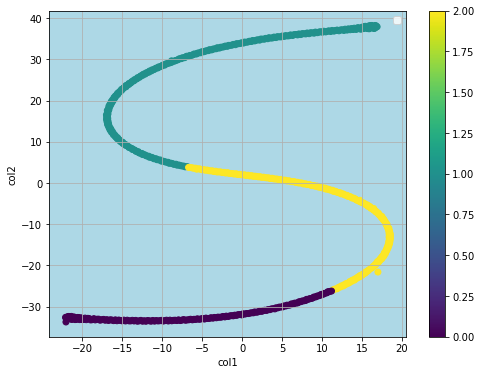

In [64]:
# Create a function called show_clusters(df) that will create a scatter plot of your dataset
plt.figure(figsize=(8,6))
plt.scatter(crypto_feat['col1'], crypto_feat['col2'], c=crypto_feat['class'])#, cmap= 'PiYG')
plt.xlabel('col1')
plt.ylabel('col2')
plt.colorbar()
matplotlib.pyplot.legend()

ax = plt.gca()
ax.set_facecolor('lightblue')
plt.grid()
plt.show()

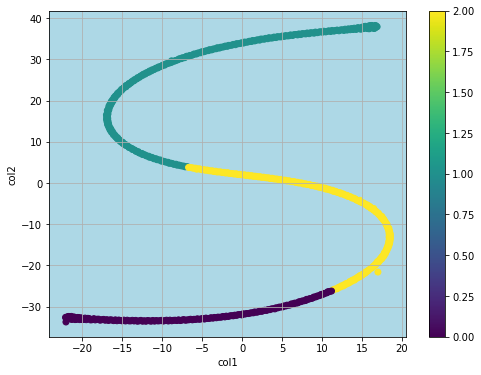

In [58]:
# Create a function called show_clusters(df) that will create a scatter plot of your dataset
plt.figure(figsize=(8,6))
plt.scatter(crypto_features['col1'], crypto_features['col2'], c=crypto_features['class'])
plt.xlabel('col1')
plt.ylabel('col2')
plt.colorbar()


ax = plt.gca()
ax.set_facecolor('lightblue')
plt.grid()
plt.show()

TypeError: not all arguments converted during string formatting

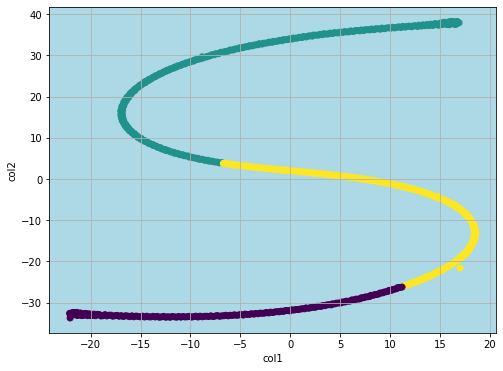

In [56]:
# Create a function called show_clusters(df) that will create a scatter plot of your dataset
plt.figure(figsize=(8,6))
index=crypto_features['index']
plt.scatter(crypto_features['col1'], crypto_features['col2'], c=crypto_features['class'])
plt.xlabel('col1')
plt.ylabel('col2')

ax = plt.gca()
ax.set_facecolor('lightblue')
plt.grid()

i = 0
markers = matplotlib.lines.Line2D.markers.keys()
colors = list("bgrcmyk")
for i in 'class':
  marker, color = markers[i % len(markers)], colors[i % len(colors)]
  plt.plot(col1[:,0],col2[:,1],marker+color)
  i += 1

plot.show()